




# Project Title: Laptop Price Prediction for SmartTech Co.
```



In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
df = pd.read_csv('/content/laptop.csv')

# **Data Exploration and Understanding**
---



In [ ]:
# First 5 rows of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# Number of rows & columns
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (1303, 13)


In [ ]:
# info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# Checking for the duplicates
print("Number of duplicates found:",df.duplicated().sum())

Number of duplicates found: 0


# **Data Preprocessing**

---



In [ ]:
# Dropping unwanted columns.
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [ ]:
# drop all the missing values
df.dropna(how='all', inplace=True)

In [ ]:
# shape of the data after dropping the missing values
print("Shape of the data:",df.shape)

Shape of the data: (1273, 11)


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# replacing str values to get the result into numeric
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
# Changing the datatypes
df['Ram'] = df['Ram'].astype("int32")

In [ ]:
# columns with special characters
columns_with_question_mark = [col for col in df.columns if df[col].astype(str).str.contains('\?').any()]
print(f"Columns containing '?': {columns_with_question_mark}")
print(f"Number of columns containing '?': {len(columns_with_question_mark)}")

Columns containing '?': ['Inches', 'Memory', 'Weight']
Number of columns containing '?': 3


In [ ]:
import numpy as np
# replace special characters with nan as null value
df['Weight'] = df['Weight'].replace('?',np.nan)
df['Inches'] = df['Inches'].replace('?',np.nan)
df['Memory'] = df['Memory'].replace('?',np.nan)

In [ ]:
# count of the null values in each column
print(df['Weight'].isnull().sum())
print(df['Inches'].isnull().sum())
print(df['Memory'].isnull().sum())

1
1
1


In [ ]:
df['Inches'] = df['Inches'].astype("float")
df['Weight'] = df['Weight'].astype('float')

In [ ]:
# Imputation method to replace null values with mean,median and mode.
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Inches'] = df['Inches'].fillna(df['Inches'].mean())
df['Memory'] = df['Memory'].fillna(df['Memory'].mode())

In [ ]:
# Transformed columns into numeric
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.4+ KB


# **Data Visualization**

---



<ipython-input-21-f48b0acdb8ac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

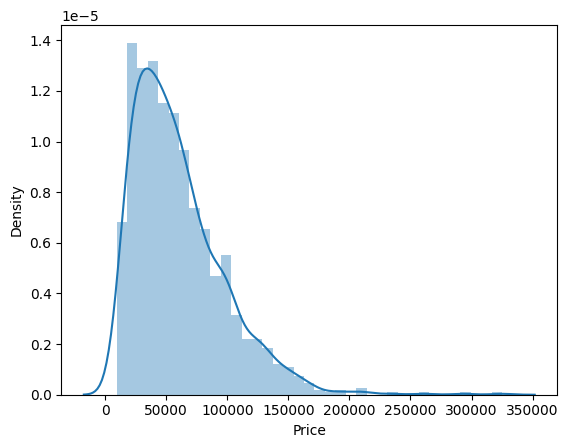

In [ ]:
# Distribution of the output variable -- price
import seaborn as sns
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

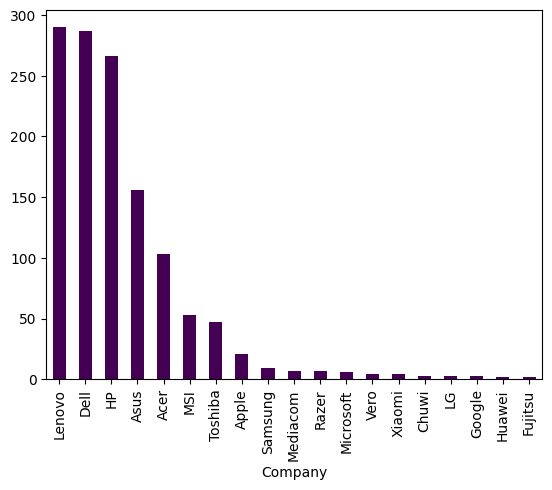

In [ ]:
# Counting the occurrences of each unique value in the 'Company' column using a bar chart
df['Company'].value_counts().plot(kind='bar',cmap='viridis')

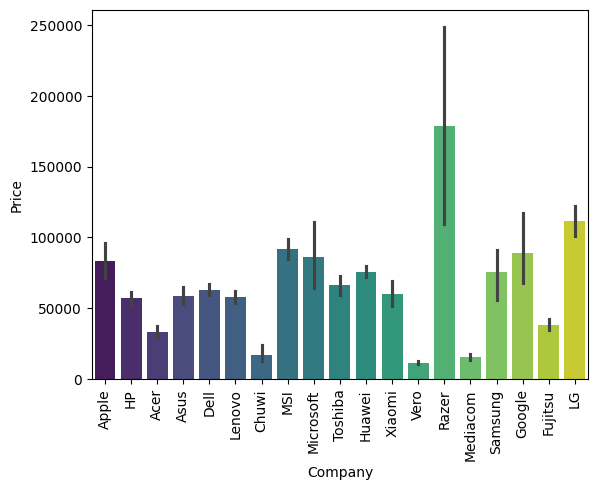

In [ ]:
# average price for each company
sns.barplot(x=df['Company'],y=df['Price'],hue= df['Company'],legend = False,palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

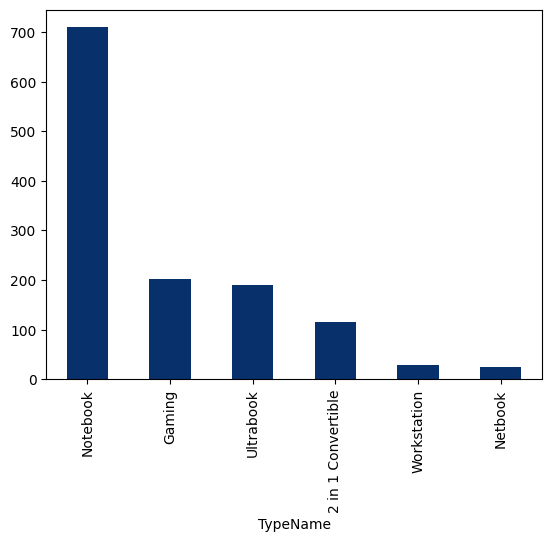

In [ ]:
# Number of occurences of each unique values in the 'Typename'.
df['TypeName'].value_counts().plot(kind='bar',cmap='Blues_r')

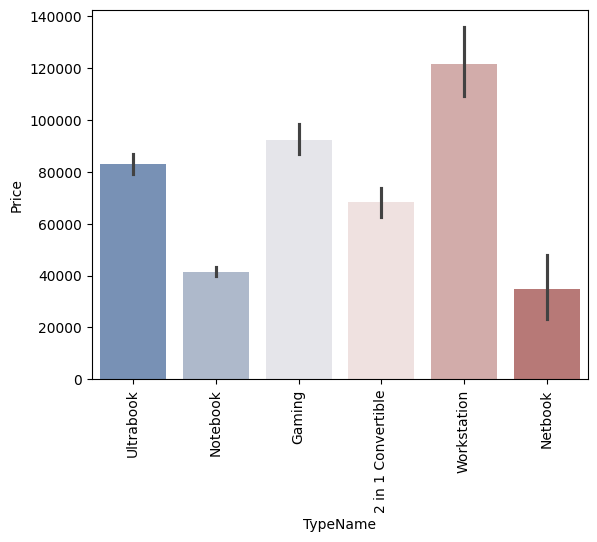

In [ ]:
# Average price for each laptop type
sns.barplot(x=df['TypeName'],y=df['Price'],hue= df['TypeName'],palette='vlag')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Count'>

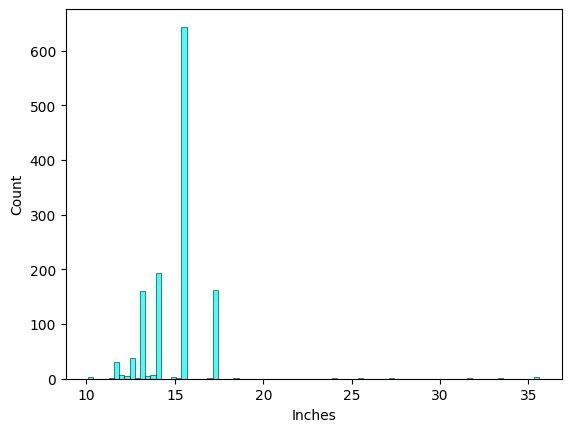

In [ ]:
# Distribution of Inches
sns.histplot(df['Inches'],color = 'cyan')

<Axes: xlabel='Inches', ylabel='Price'>

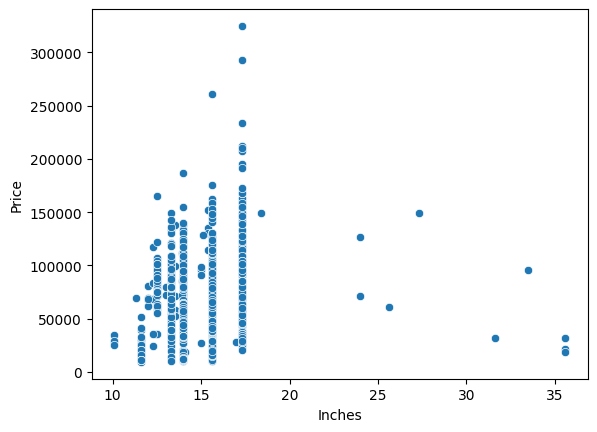

In [ ]:
# Average price based on inches
sns.scatterplot(x=df['Inches'],y=df['Price'])

# **Feature Engineering**
---



* ***Screeen Resolution***





In [ ]:
#count of laptops having each specific screen resolution.
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
# Creating a new column 'Touchscreen'. Applied lambda function to each value in 'ScreenResolution'.
# This function checks if the 'Touchscreen' is present in the column.
# If found, it returns 1 (indicating it has a touchscreen), otherwise it returns 0.
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
# checking the new column
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
509,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,61218.720,0
415,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.30,31909.392,0
798,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,71874.720,1
897,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952.000,0
869,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.840,0


Text(0, 0.5, 'Number of Laptops')

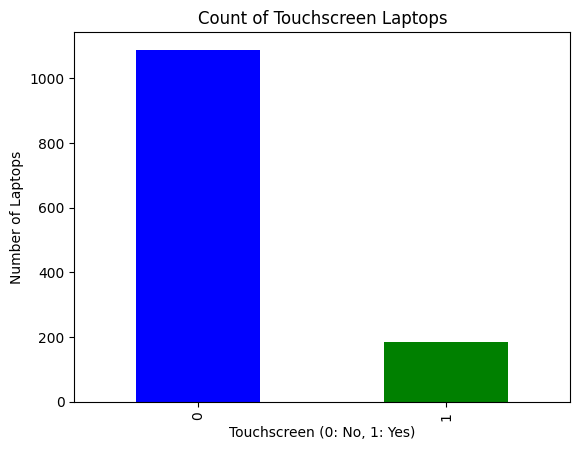

In [ ]:
# count of touchscreen laptops
df['Touchscreen'].value_counts().plot(kind='bar',color= ['blue','green'])
plt.title('Count of Touchscreen Laptops')
plt.xlabel('Touchscreen (0: No, 1: Yes)')
plt.ylabel('Number of Laptops')

Text(0.5, 1.0, 'Average Price by Touchscreen')

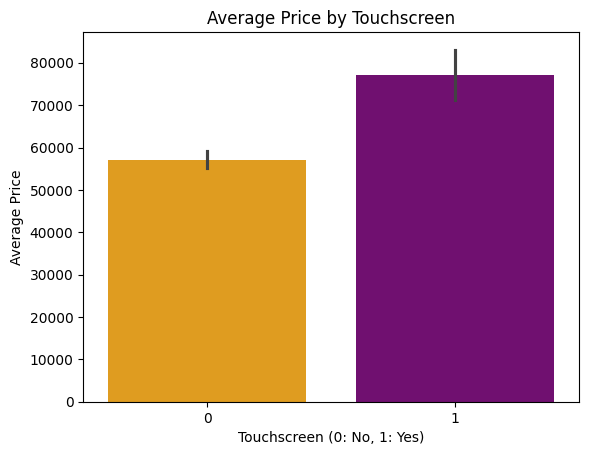

In [ ]:
# average price for laptops with and without a touchscreen.
sns.barplot(x=df['Touchscreen'],y=df['Price'],hue = df['Touchscreen'],legend = False,palette=['orange', 'purple'])
plt.xlabel('Touchscreen (0: No, 1: Yes)')
plt.ylabel('Average Price')
plt.title('Average Price by Touchscreen')

In [ ]:
# Creating a new column 'Ips' by extracting information from 'ScreenResolution'.
# whether a laptop has an IPS panel (1) or not (0).
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


Text(0, 0.5, 'Number of Laptops')

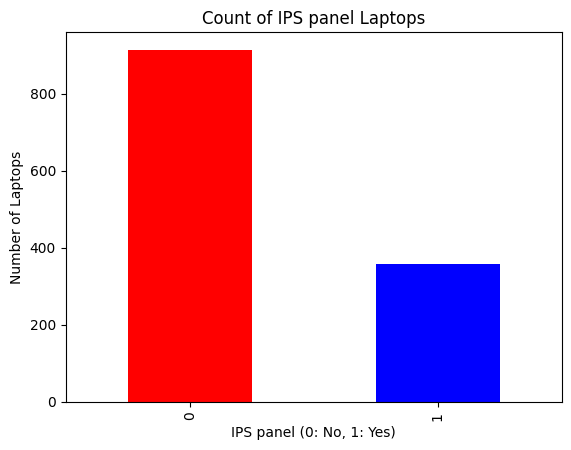

In [ ]:
# Number of laptops having IPS panel in it.
df['Ips'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Count of IPS panel Laptops')
plt.xlabel('IPS panel (0: No, 1: Yes)')
plt.ylabel('Number of Laptops')

Text(0.5, 1.0, 'Average Price by IPS')

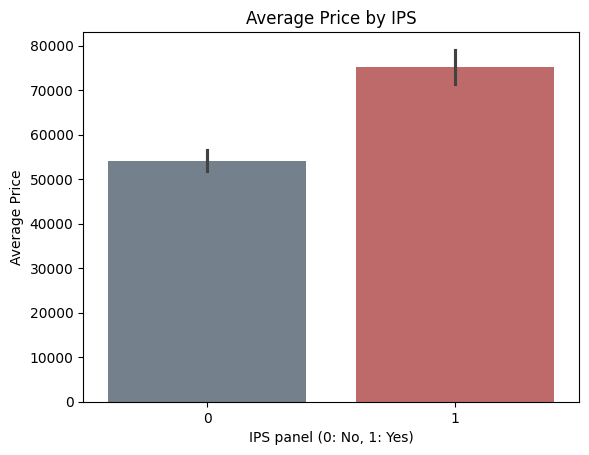

In [ ]:
# average price for laptops with and without a IPS panel.
sns.barplot(x=df['Ips'],y=df['Price'],hue = df['Ips'],legend = False,palette=['slategray', 'indianred'])
plt.xlabel('IPS panel (0: No, 1: Yes)')
plt.ylabel('Average Price')
plt.title('Average Price by IPS')

In [ ]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
# extracting the laptop Screen width and height from screen resolution
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
880,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,90576.0000,1,0,Full HD / Touchscreen 1920,1080
1143,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.1200,0,1,IPS Panel Full HD 1920,1080
468,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.78,90522.7200,0,1,IPS Panel Full HD 1920,1080
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,34046.4528,1,0,Full HD / Touchscreen 1920,1080
523,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.63,36709.9200,0,0,1366,768


In [ ]:
# finding and extracting the numerical part and applied(lambda x:x[0]) to get the first match (the extracted number) from the list returned by findall.
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
# changed the datatype of screen width and height from object to int.
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
# checking the info after changing the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 154.2+ KB


In [ ]:
# Checking the correlation between the numerical columns
df.corr(numeric_only=True)['Price']

,Price
Inches,0.044622
Ram,0.685648
Weight,0.175896
Price,1.000000
Touchscreen,0.188994
Ips,0.254851
X_res,0.557556
Y_res,0.554069


In [ ]:
# ppi represents pixels per inch for each laptop screen
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
# checking the correlation b/w variable after adding ppi column
df.corr(numeric_only=True)['Price']

,Price
Inches,0.044622
Ram,0.685648
Weight,0.175896
Price,1.000000
Touchscreen,0.188994
Ips,0.254851
X_res,0.557556
Y_res,0.554069
ppi,0.468783


In [ ]:
# drop unwanted column after feature engineering
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
# dropping other unwanted columns
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# **CPU**

---


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [ ]:
# splitting different cpu names
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
# definig function to fetch laptop processors
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

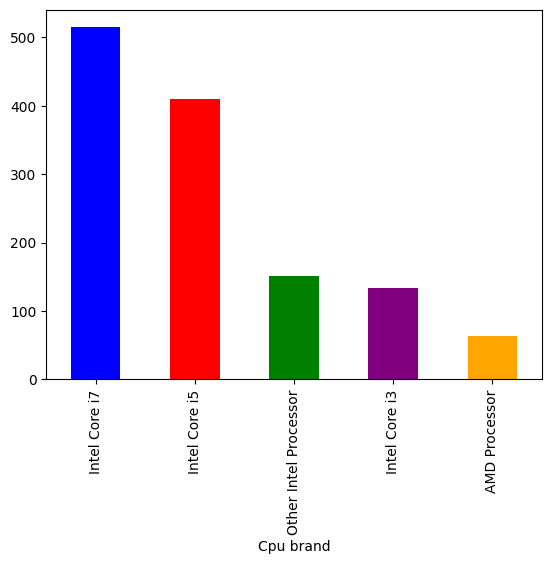

In [ ]:
# count of the number of cpu brands
df['Cpu brand'].value_counts().plot(kind='bar',color=['blue', 'red', 'green','purple', 'orange'])

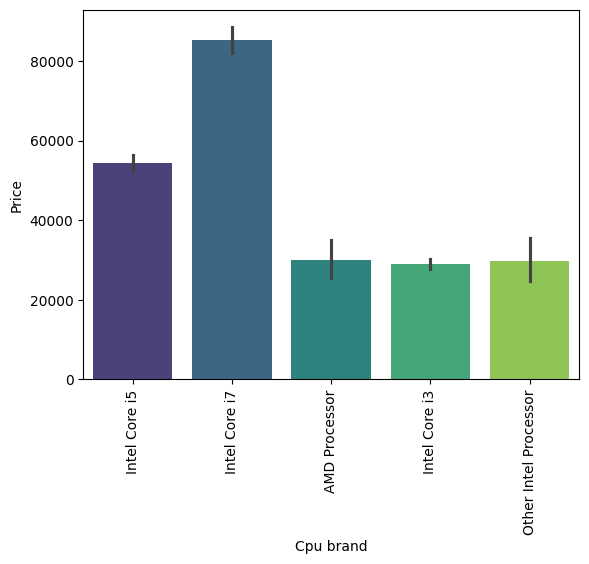

In [ ]:
# average price based on cpu brand.
sns.barplot(x=df['Cpu brand'],y=df['Price'],palette = 'viridis',hue = df['Cpu brand'],legend = False)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# dropped the columns after feature engineering
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# ***RAM***

---


Text(0.5, 1.0, 'Count of Laptops by RAM')

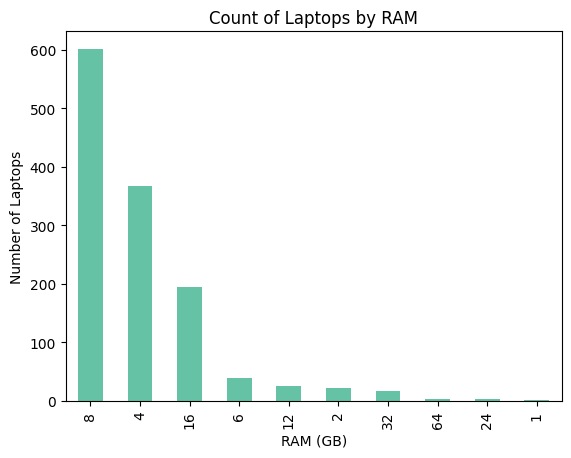

In [ ]:
# count of the laptops based on RAM
df['Ram'].value_counts().plot(kind='bar',cmap = 'Set2')
plt.xlabel('RAM (GB)')
plt.ylabel('Number of Laptops')
plt.title('Count of Laptops by RAM')

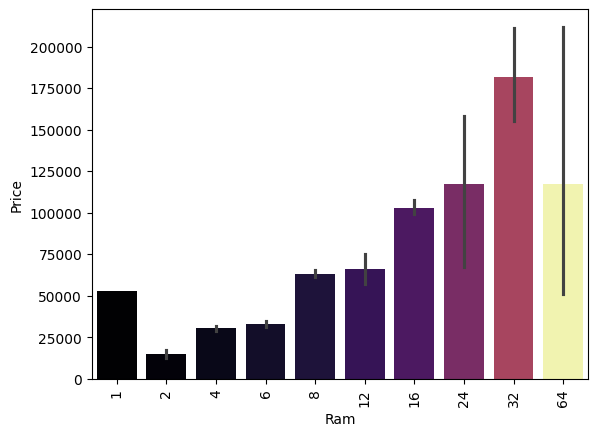

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'],palette = 'inferno',hue= df['Ram'],legend = False)
plt.xticks(rotation='vertical')
plt.show()

# ***Memory***

---


In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [ ]:
# extracting the memory amount and type from memory column
df['Memory Amount'] = df['Memory'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) and x else '')
df['Memory Type'] = df['Memory'].apply(lambda x: x.split(' ')[1] if isinstance(x, str) and len(x.split(' ')) > 1 else '')


In [ ]:
# defining a function to convert memory amount into MB
def turn_memory_into_MB(value):

  # GB to MB -- multiply by 100
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
   # TB to MB -- multiply by 1000000
  elif "TB" in value:
    return float(value[:value.find("TB")])*1000000

# applying filter to memory amount column
df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_MB)

In [ ]:
# Encoding based on Memory types of the laptops
memory_type_dummies = pd.get_dummies(df['Memory Type'], dtype=int)
df = df.join(memory_type_dummies)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Memory Amount,Memory Type,,Flash,HDD,Hybrid,SSD
526,Lenovo,Notebook,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,42570.720,0,0,141.211998,Intel Core i7,1000000.0,HDD,0,0,1,0,0
191,Vero,Notebook,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.800,0,1,157.350512,Other Intel Processor,32000.0,Flash,0,1,0,0,0
441,Dell,Notebook,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,39906.720,0,0,141.211998,Intel Core i5,256000.0,SSD,0,0,0,0,1
547,Lenovo,Notebook,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.008,0,0,141.211998,Intel Core i5,1000000.0,HDD,0,0,1,0,0
489,Asus,Ultrabook,16,512GB SSD,Intel HD Graphics 620,Windows 10,0.91,103896.000,0,0,176.232574,Intel Core i7,512000.0,SSD,0,0,0,0,1


In [ ]:
# droped these columns after all the feature engineering
df.drop(columns=['Memory'],inplace=True)
df.drop(columns=['Memory Type'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Memory Amount,,Flash,HDD,Hybrid,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128000.0,0,0,0,0,1
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128000.0,0,1,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256000.0,0,0,0,0,1
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512000.0,0,0,0,0,1
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256000.0,0,0,0,0,1


In [ ]:
df.rename(columns={'Flash': 'Flash_Storage'}, inplace=True)

In [ ]:
# checking for the weak correlation variables
df.corr(numeric_only=True)['Price']

,Price
Ram,0.685648
Weight,0.175896
Price,1.000000
Touchscreen,0.188994
Ips,0.254851
ppi,0.468783
Memory Amount,-0.126002
,0.002241
Flash_Storage,-0.207847
HDD,-0.427136


In [ ]:
# dropping the weak correlation columns
df.drop(columns=['Hybrid','Flash_Storage','Memory Amount'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int32  
 3   Gpu          1273 non-null   object 
 4   OpSys        1273 non-null   object 
 5   Weight       1273 non-null   float64
 6   Price        1273 non-null   float64
 7   Touchscreen  1273 non-null   int64  
 8   Ips          1273 non-null   int64  
 9   ppi          1273 non-null   float64
 10  Cpu brand    1273 non-null   object 
 11               1273 non-null   int64  
 12  HDD          1273 non-null   int64  
 13  SSD          1273 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(5)
memory usage: 144.2+ KB


In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,0,1
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,0,1
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,0,1
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,0,1


# ***GPU***

---



In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [ ]:
# split of GPU brand from GPU column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
# checking the splitting
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,0,1,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,0,1,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,0,1,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,0,1,Intel


In [ ]:
# count of the GPU brands
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


In [ ]:
# removed the ARM GpU brand as there is only one laptop present with that brand
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
# count of laptops based on GPU brands
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,703
Nvidia,393
AMD,176


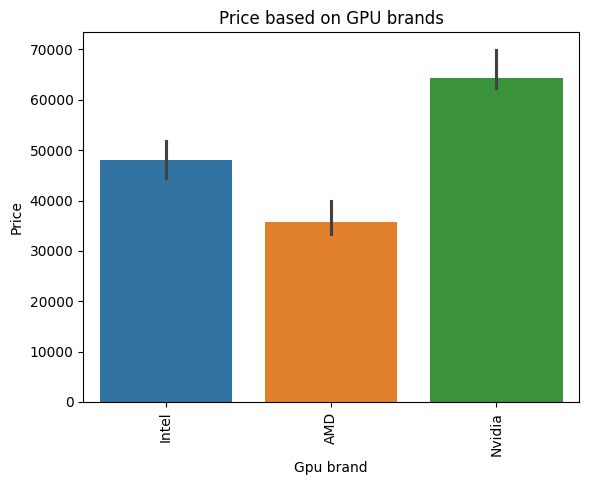

In [ ]:
# price based on GPU brands
sns.barplot(x=df['Gpu brand'],y=df['Price'],hue = df['Gpu brand'],estimator=np.median,palette = 'tab10')
plt.xticks(rotation='vertical')
plt.title('Price based on GPU brands')
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,0,1,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,0,1,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,0,1,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,0,1,Intel


# ***OpSys***

---



In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [ ]:
# Grouping the various types of operating systems
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,0,1,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,0,1,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac


In [ ]:
# Dropping the Opsys column as its no longer needed
df.drop(columns=['OpSys'],inplace=True)

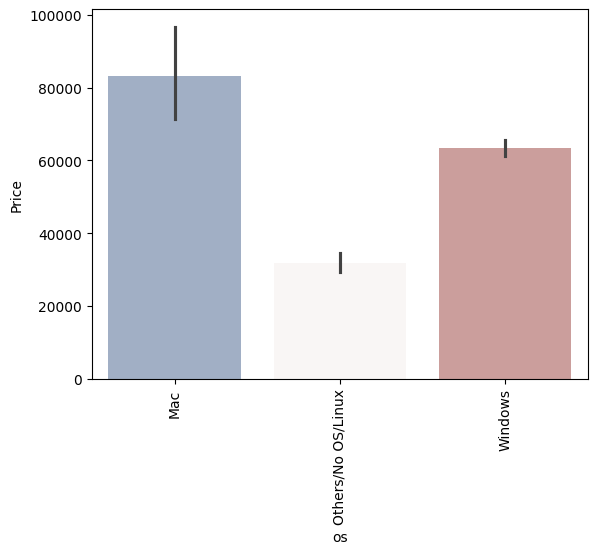

In [ ]:
# price based on various operating systems
sns.barplot(x=df['os'],y=df['Price'],palette = 'vlag' ,hue = df['os'],legend = False)
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-88-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

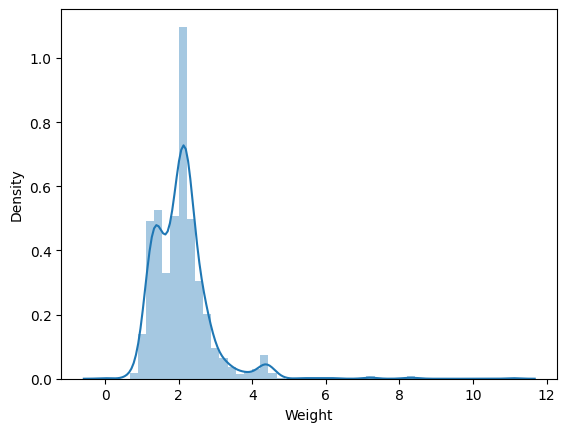

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

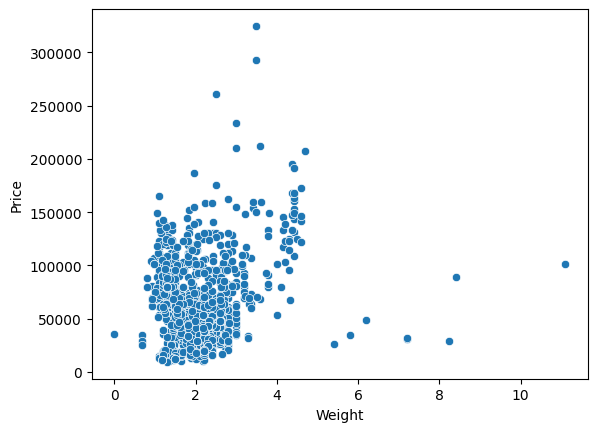

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.685521
Weight,0.175416
Price,1.000000
Touchscreen,0.190738
Ips,0.255987
ppi,0.470701
,0.002226
HDD,-0.427612
SSD,0.512549


<Axes: >

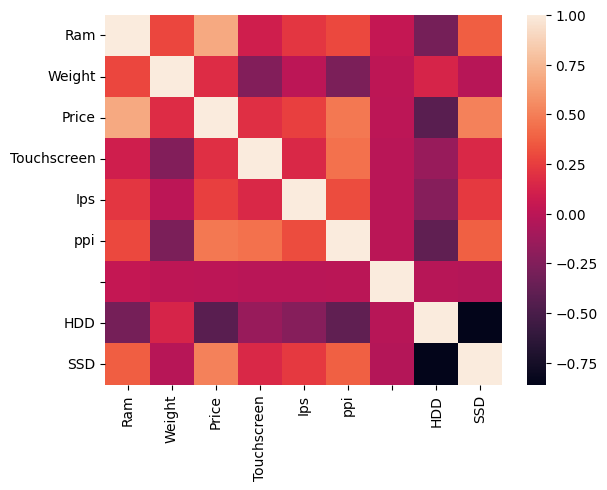

In [ ]:
# correlation matrix for better visualization of the relation b/w variables
sns.heatmap(df.corr(numeric_only=True))

<ipython-input-92-6ac7bf0c5fc1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

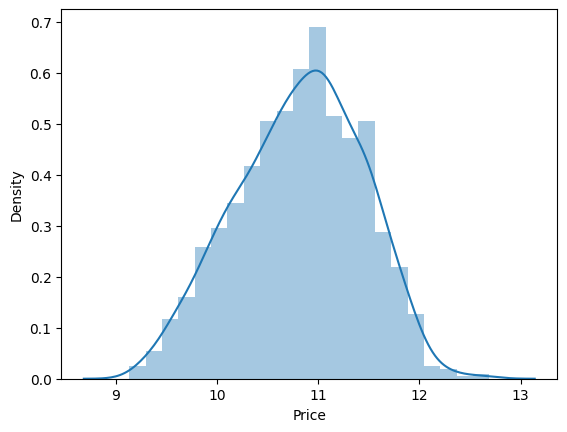

In [ ]:
# applying log transformation for skewed data in the output variable.
sns.distplot(np.log(df['Price']))

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,0,1,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,0,1,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,0,1,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,0,1,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1,0,AMD,Windows


In [ ]:
# store all the input variables in x and output variable in y.
# input variables are stored in X variable.
X = df.drop(columns=['Price'])
# output variable is stored in y variable.
y = np.log(df['Price'])

In [ ]:
# check the all input varaiables in x
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,0,1,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,0,1,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,0,1,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,0,1,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,0,1,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1,0,AMD,Windows


In [ ]:
# output variable for predicting laptop prices.
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


# **Modelling**

---



In [ ]:
# Split all the data into train(80%) and test(20%).
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
# Import all the required libraries.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
# import all the algorithms to train the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Linear regression

In [ ]:
# apply one hot encoding to the numerical columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11,12])   # column index numbers to apply encoding

],remainder='passthrough')     # column numbers not listed are passed throught unchanged.

# algorithm to train the model
step2 = LinearRegression()

# pipeline created to sequence the column transformer followed by linear regression model.
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the linear regression model on the training data.
pipe.fit(X_train,y_train)

# prediction on test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of the model on test data.
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6400290954998205
MAE 0.2329272098753979


### Random Forest

In [ ]:
# column transformer used to handle categorical variables.
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11,12])  # column index numbers to apply encoding

],remainder='passthrough') # column numbers not listed are passed throught unchanged.

# algorithm to train the model
step2 = RandomForestRegressor(n_estimators=100,     # hyperparameters
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# pipeline created to sequence the column transformer followed by Randomforest regressor model.
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the Randomforest regressor model on the training data.
pipe.fit(X_train,y_train)

# prediction on test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of the model on test data.
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8146249800929091
MAE 0.18736865179343073


### XgBoost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,   # determines the number of boosting rounds for better accurate model.
                     max_depth=5,     # depth of the tree from the root node.
                                          # Restricts each tree in the model to a maximum depth of 5 levels.
                     learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the xgboost regressor on the training data.
pipe.fit(X_train,y_train)

# prediction on test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of xgboost model on test data.
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7988334102298323
MAE 0.1888206573427635


# *Final comparison*

---




**R2 Score:**
* Random Forest: ≈ 0.8146
* XGBoost: ≈ 0.7988
* Linear Regression: ≈ 0.6400
-The Random Forest Regressor has the highest R2 score, slightly better than XGBoost and significantly better than Linear Regression.

**MAE:**
* Random Forest: ≈ 0.1873
* XGBoost: ≈ 0.1888
* Linear Regression: ≈ 0.2329
- The Random Forest Regressor also has the lowest MAE, again slightly better than XGBoost and significantly better than Linear Regression.

The best model : RandomForest Regressoor

Since the Random Forest Regressor achieved the highest R2 score and the lowest MAE (indicating the smallest average prediction error) on the test data, it is the best-performing algorithm among the three I had evaluated for predicting laptop prices.